 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls

print(whale.isnull().sum())

print(whale.isnull().sum(axis=1))

#Four nulls in row 1, 1 in each column

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64
Date
2015-03-02    4
2015-03-03    0
2015-03-04    0
2015-03-05    0
2015-03-06    0
             ..
2019-04-25    0
2019-04-26    0
2019-04-29    0
2019-04-30    0
2019-05-01    0
Length: 1060, dtype: int64


In [4]:
# Drop nulls
whale.dropna(inplace=True)
whale.head()
print(whale.isnull().sum())



SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")

algo = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo.head()



,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls

print(algo.isnull().sum())

#6 nulls in Algo 2 column

Algo 1    0
Algo 2    6
dtype: int64


In [7]:
# Drop nulls

algo.dropna(inplace=True)
algo.head()

print(algo.isnull().sum())


Algo 1    0
Algo 2    0
dtype: int64


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")

sp500 = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True)
sp500.head()



,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
sp500.dtypes


Close    object
dtype: object

In [10]:
# Fix Data Types

sp500["Close"]= sp500["Close"].str.replace('$','').astype("float")
sp500.head()



,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [11]:
sp500.sort_index(inplace=True)
sp500.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [12]:
# Calculate Daily Returns

sp500_returns = sp500.pct_change()
sp500_returns.head()


,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Drop nulls

sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column

sp500_returns.rename(columns = {"Close":"S&P500"}, inplace = True)
sp500_returns.head()


,S&P500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
returns_c = pd.concat([whale, algo,sp500_returns], axis = "columns",join = "inner")
returns_c.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

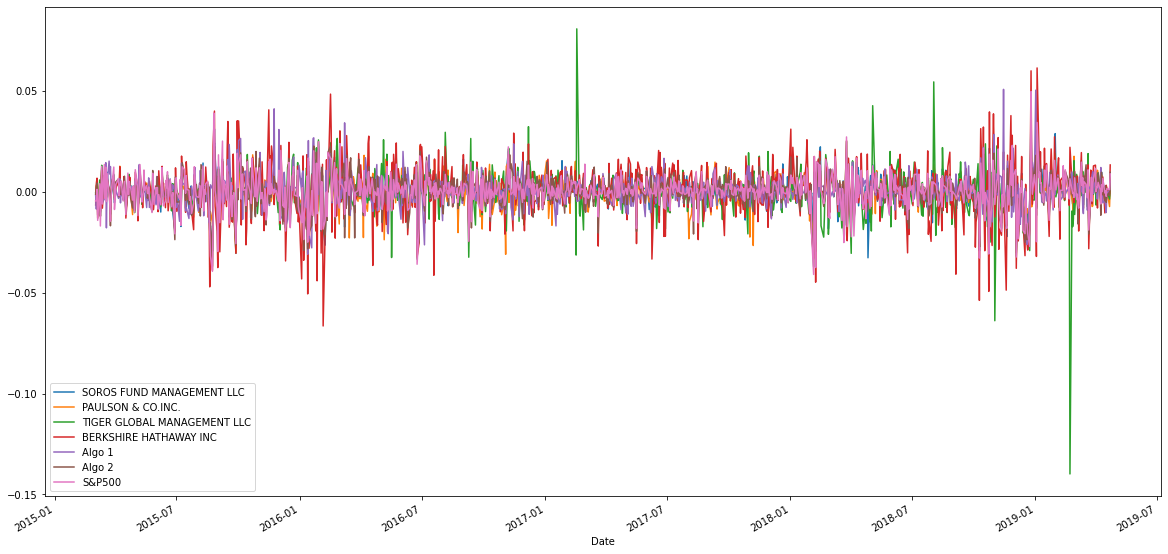

In [16]:
# Plot daily returns

returns_c.plot(figsize = (20,10))



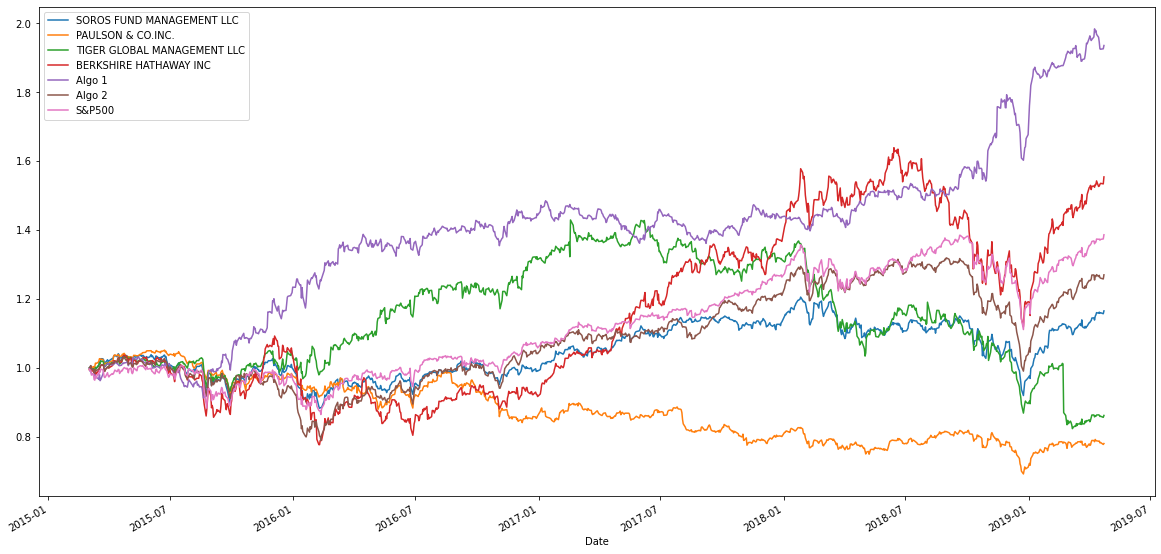

In [17]:
# Plot cumulative returns

returns_cum = (1 + returns_c).cumprod()
returns_cum.plot(figsize = (20,10))

#cumprod

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

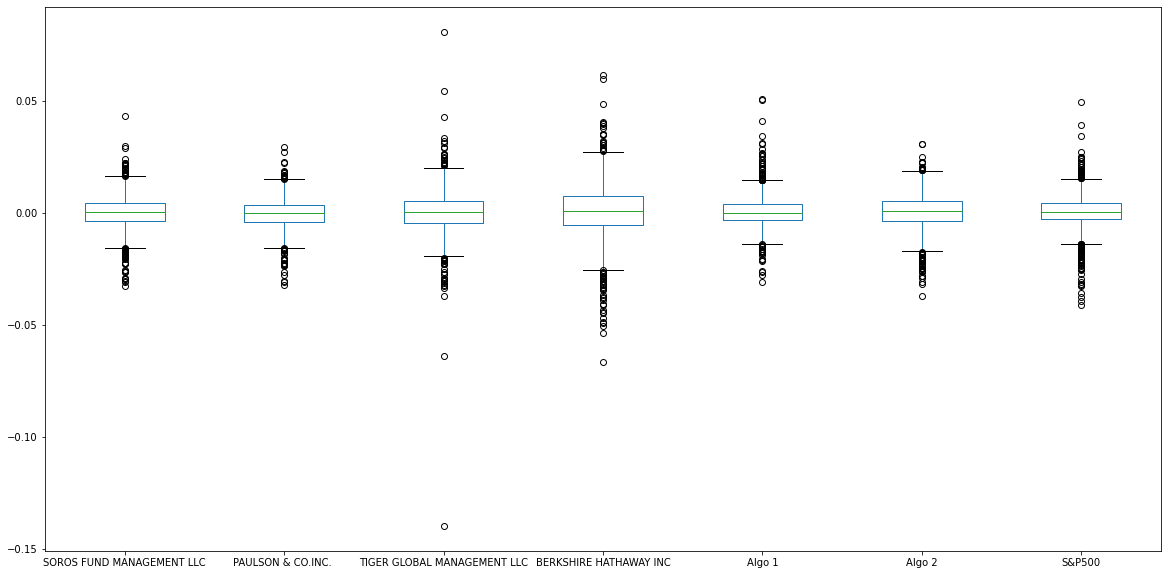

In [18]:
# Box plot to visually show risk

returns_c.plot(kind = "box", figsize = (20,10))


In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
#returns_c_std = returns_c.std()
returns_c_std = pd.DataFrame(returns_c.std()).rename(columns = {0:"std"})

returns_c_std
#pd.std()


,std
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919
Algo 1,0.007620
Algo 2,0.008342
S&P500,0.008554


In [20]:
# Determine which portfolios are riskier than the S&P 500
riskier = returns_c_std[returns_c_std["std"] > returns_c_std.loc["S&P500", "std"]]
riskier



,std
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [21]:
# Calculate the annualized standard deviation (252 trading days)
returns_c_annualized_std = returns_c_std*np.sqrt(252)
returns_c_annualized_std



,std
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077
Algo 1,0.120967
Algo 2,0.132430
S&P500,0.135786


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

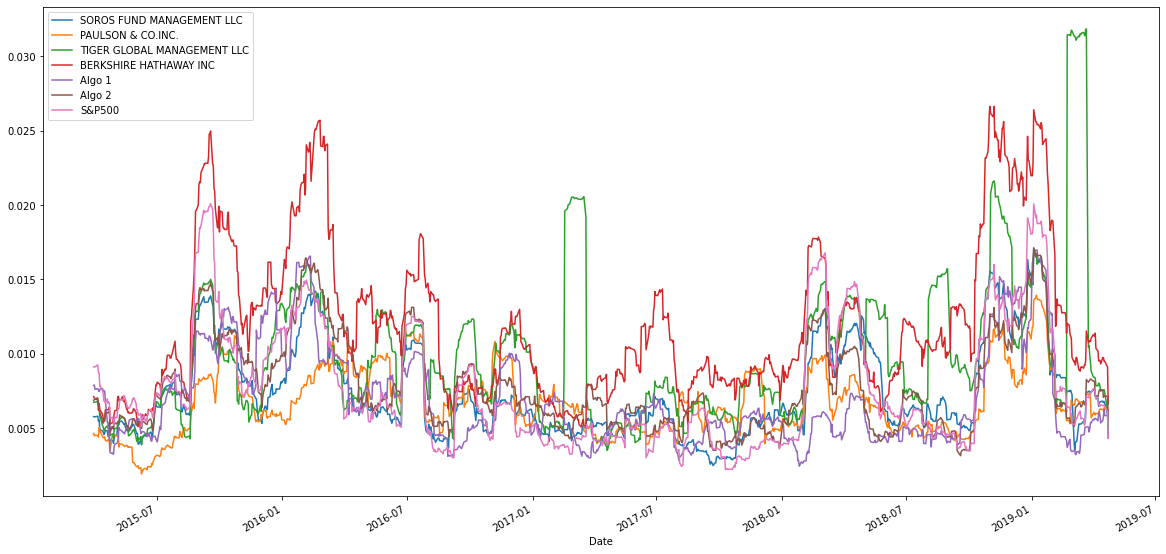

In [22]:
# Calculate and plot the rolling standard deviation for

rolling_std = returns_c.rolling(window = 21).std()
rolling_std.plot(figsize = (20,10))
# the S&P 500 and whale portfolios using a 21 trading day window


                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P500                                        0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

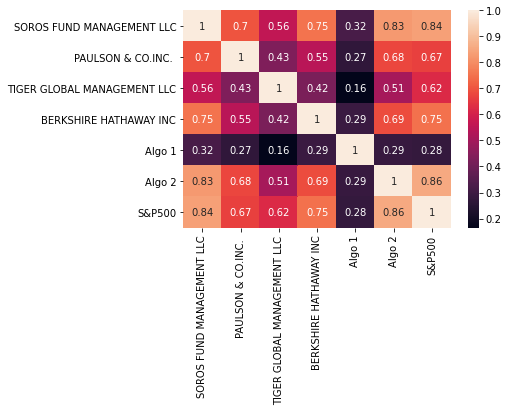

In [23]:
# Construct a correlation table
import seaborn as sns
returns_corr = returns_c.corr()
print(returns_corr)
sns.heatmap(returns_corr, annot=True)

#Algo 2 and Soros Fund Management returns most closely mimic S&P 500

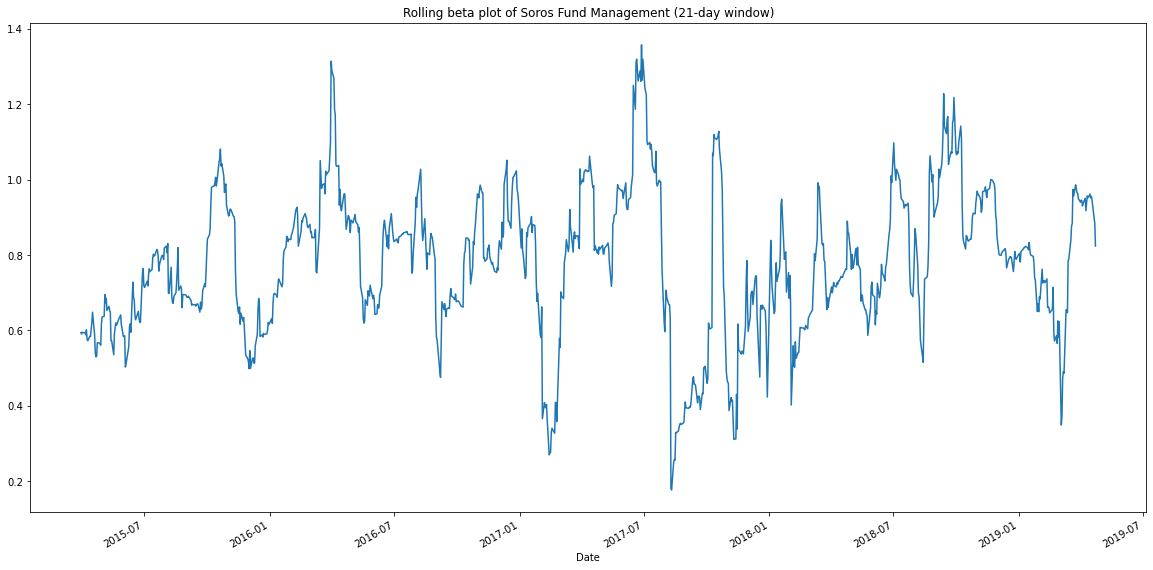

In [25]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

rolling_covariance = returns_c['SOROS FUND MANAGEMENT LLC'].rolling(window=21).cov(returns_c['S&P500'])
rolling_variance = returns_c['S&P500'].rolling(window=21).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling beta plot of Soros Fund Management (21-day window)')



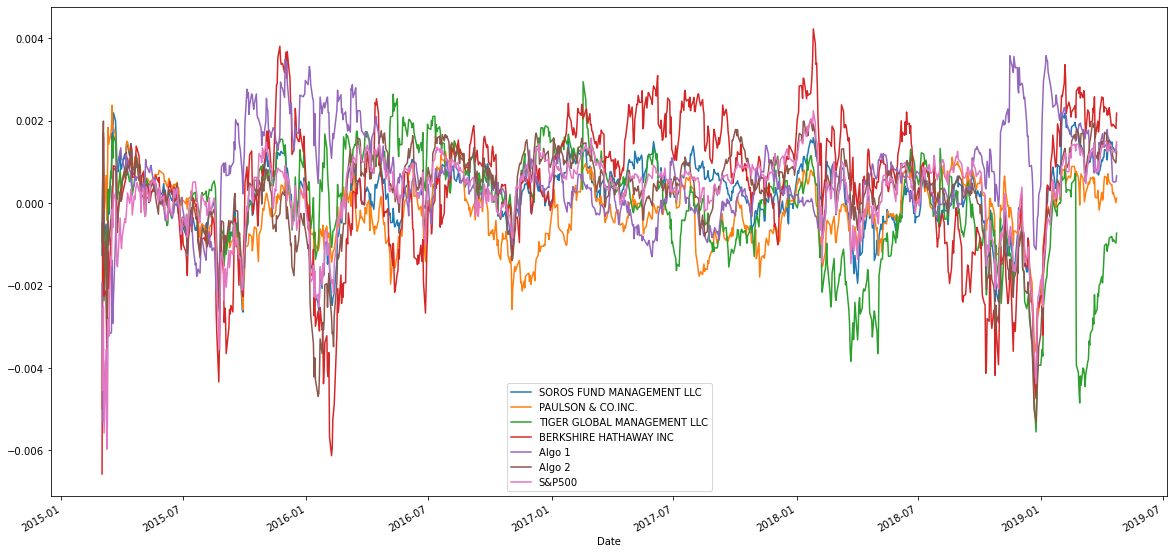

In [26]:
# Calculate a rolling window using the exponentially weighted moving average.

returns_c_ewm = returns_c.ewm(halflife=21).mean()
returns_c_ewm.plot(figsize=(20,10))


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [27]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = returns_c.mean()*252/(returns_c.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P500                         0.648267
dtype: float64

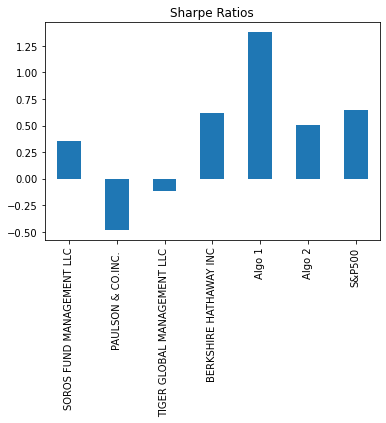

In [66]:
# Visualize the sharpe ratios as a bar plot

sharpe_ratio.plot(kind="bar", title='Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [31]:
# Read the first stock
# YOUR CODE HERE
tsla_csv = Path("Resources/tsla_historical.csv")
tsla = pd.read_csv(tsla_csv, index_col="Date", parse_dates=True)
tsla.head()

,Symbol,Close
Date,,
2012-10-01,TSLA,29.16
2012-10-02,TSLA,29.80
2012-10-03,TSLA,29.30
2012-10-04,TSLA,29.40
2012-10-05,TSLA,28.89


In [33]:
# Read the second stock
amzn_csv = Path("Resources/amzn_historical.csv")
amzn = pd.read_csv(amzn_csv, index_col="Date", parse_dates=True)
amzn.head()

,Symbol,Close
Date,,
2012-10-01,AMZN,252.01
2012-10-02,AMZN,250.60
2012-10-03,AMZN,255.92
2012-10-04,AMZN,260.47
2012-10-05,AMZN,258.51


In [34]:
# Read the third stock
nflx_csv = Path("Resources/nflx_historical.csv")
nflx = pd.read_csv(nflx_csv, index_col="Date", parse_dates=True)
nflx.head()

,Symbol,Close
Date,,
2012-10-01,NFLX,8.01
2012-10-02,NFLX,8.07
2012-10-03,NFLX,8.94
2012-10-04,NFLX,9.52
2012-10-05,NFLX,9.51


In [42]:
# Concatenate all stocks into a single DataFrame
custom = pd.concat((tsla,amzn,nflx))
custom.sort_index(ascending = True, inplace = True)
custom.head()

,Symbol,Close
Date,,
2012-10-01,TSLA,29.16
2012-10-01,NFLX,8.01
2012-10-01,AMZN,252.01
2012-10-02,TSLA,29.80
2012-10-02,NFLX,8.07


In [41]:
# Reset the index
custom.index = custom.index.normalize()
custom.pivot(columns="")

In [46]:
# Pivot so that each column of prices represents a unique symbol
custom2 = custom.pivot(columns="Symbol")
custom2.head()

Close             
Symbol        AMZN  NFLX   TSLA
Date                           
2012-10-01  252.01  8.01  29.16
2012-10-02  250.60  8.07  29.80
2012-10-03  255.92  8.94  29.30
2012-10-04  260.47  9.52  29.40
2012-10-05  258.51  9.51  28.89

In [47]:
# Drop Nulls
custom2.dropna(inplace=True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [50]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
#dot product pandas dataframe

paul_portfolio = custom2.dot(weights)
paul_portfolio_returns = paul_portfolio.pct_change()
paul_portfolio_returns.head()

Date
2012-10-01         NaN
2012-10-02   -0.002455
2012-10-03    0.019725
2012-10-04    0.017779
2012-10-05   -0.008284
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
returns_joined = pd.concat((paul_portfolio_returns,returns_c),axis=1,join="inner")
returns_joined.dropna(inplace=True)
returns_joined.rename(columns = {0:"Paul"}, inplace = True)
returns_joined.head()

,Paul,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2015-03-03,0.000599,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000429,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004599,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.025074,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.008985,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
returns_joined.head()

,Paul,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,,
2015-03-03,0.000599,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.000429,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004599,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.025074,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,-0.008985,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [62]:
# Risk
returns_joined_std = pd.DataFrame(returns_joined.std()).rename(columns = {0:"std"})
returns_joined_std

returns_joined_annualized_std = returns_joined_std*np.sqrt(252)
returns_joined_annualized_std

,std
Paul,0.274355
SOROS FUND MANAGEMENT LLC,0.125348
PAULSON & CO.INC.,0.111527
TIGER GLOBAL MANAGEMENT LLC,0.172989
BERKSHIRE HATHAWAY INC,0.205079
Algo 1,0.121006
Algo 2,0.132413
S&P500,0.135787


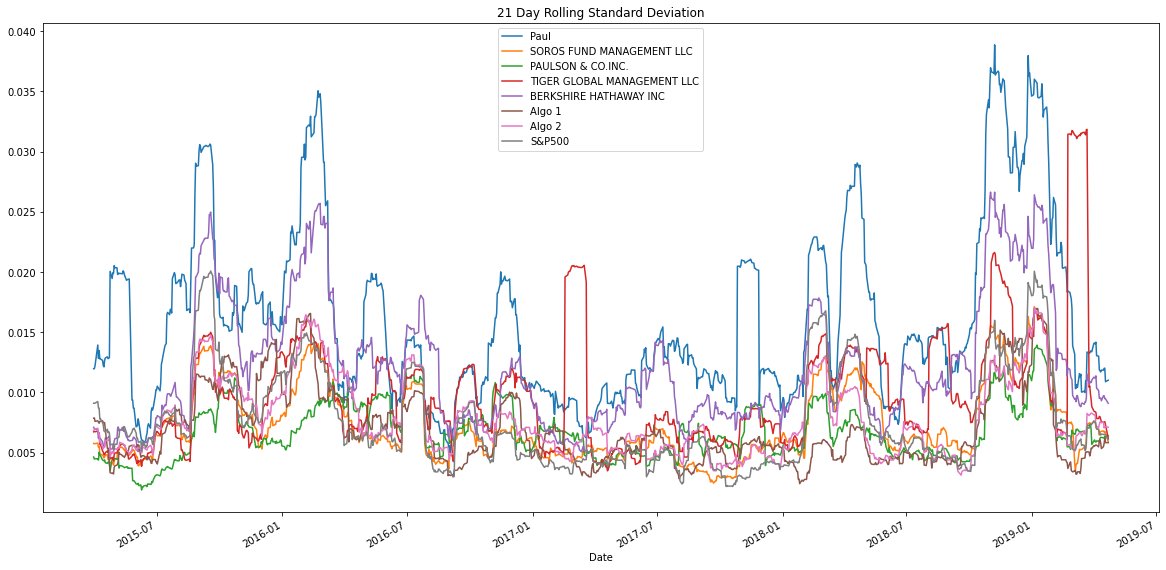

In [65]:
# Rolling
rolling_returns_joined_std = returns_joined.rolling(window = 21).std()
rolling_returns_joined_std.plot(figsize = (20,10), title="21 Day Rolling Standard Deviation")


In [67]:
# Annualized Sharpe Ratios
sharpe_ratio_returns_joined = returns_joined.mean()*252/(returns_joined.std()*np.sqrt(252))
sharpe_ratio_returns_joined

Paul                           1.332570
SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P500                         0.633139
dtype: float64

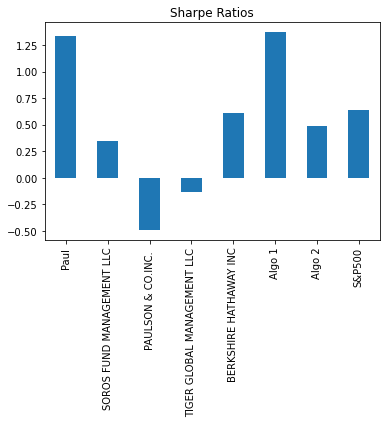

In [68]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratio_returns_joined.plot(kind="bar", title='Sharpe Ratios')

                                 Paul  SOROS FUND MANAGEMENT LLC  \
Paul                         1.000000                   0.607908   
SOROS FUND MANAGEMENT LLC    0.607908                   1.000000   
PAULSON & CO.INC.            0.451388                   0.699823   
TIGER GLOBAL MANAGEMENT LLC  0.393952                   0.561040   
BERKSHIRE HATHAWAY INC       0.707635                   0.754157   
Algo 1                       0.257816                   0.320901   
Algo 2                       0.571147                   0.826730   
S&P500                       0.680034                   0.837731   

                             PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Paul                                   0.451388                     0.393952   
SOROS FUND MANAGEMENT LLC              0.699823                     0.561040   
PAULSON & CO.INC.                      1.000000                     0.434308   
TIGER GLOBAL MANAGEMENT LLC            0.434308                    

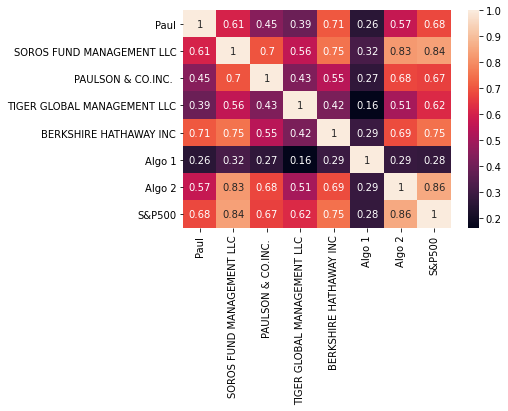

In [69]:
# Create a correlation analysis
returns_joined_corr = returns_joined.corr()
print(returns_joined_corr)
sns.heatmap(returns_joined_corr, annot=True)

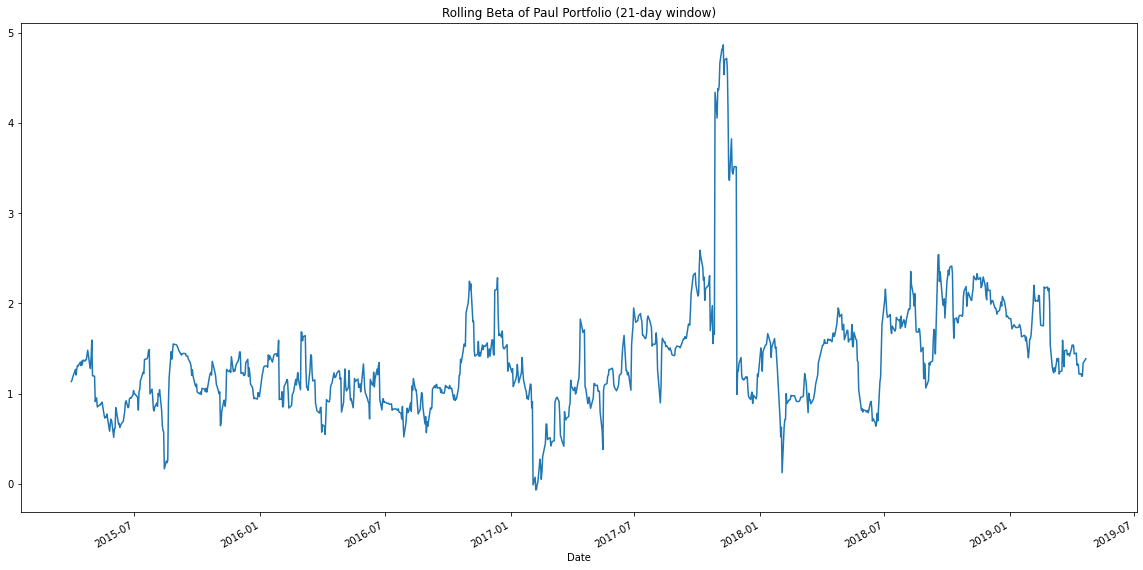

In [70]:
# Beta
rolling_joined_covariance = returns_joined['Paul'].rolling(window=21).cov(returns_joined['S&P500'])
rolling_joined_variance = returns_joined['S&P500'].rolling(window=21).var()
rolling_joined_beta = rolling_joined_covariance / rolling_joined_variance
rolling_joined_beta.plot(figsize=(20, 10), title='Rolling Beta of Paul Portfolio (21-day window)')